In [1]:
%matplotlib inline

/Users/marcin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
train = pd.read_csv('../data/raw/train.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
passenger_list = list(train['PassengerId'])
print len(passenger_list) == len(set(passenger_list))

True


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train["Age"] = train["Age"].fillna(np.median(train["Age"].dropna()))

In [11]:
train[train.isnull().any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [23]:
def gender_as_int(gender):
    if gender == "male":
        return 0.0
    else:
        return 1.0

train["GenderAsInt"] = train.apply(lambda row: gender_as_int(row["Sex"]), 1)

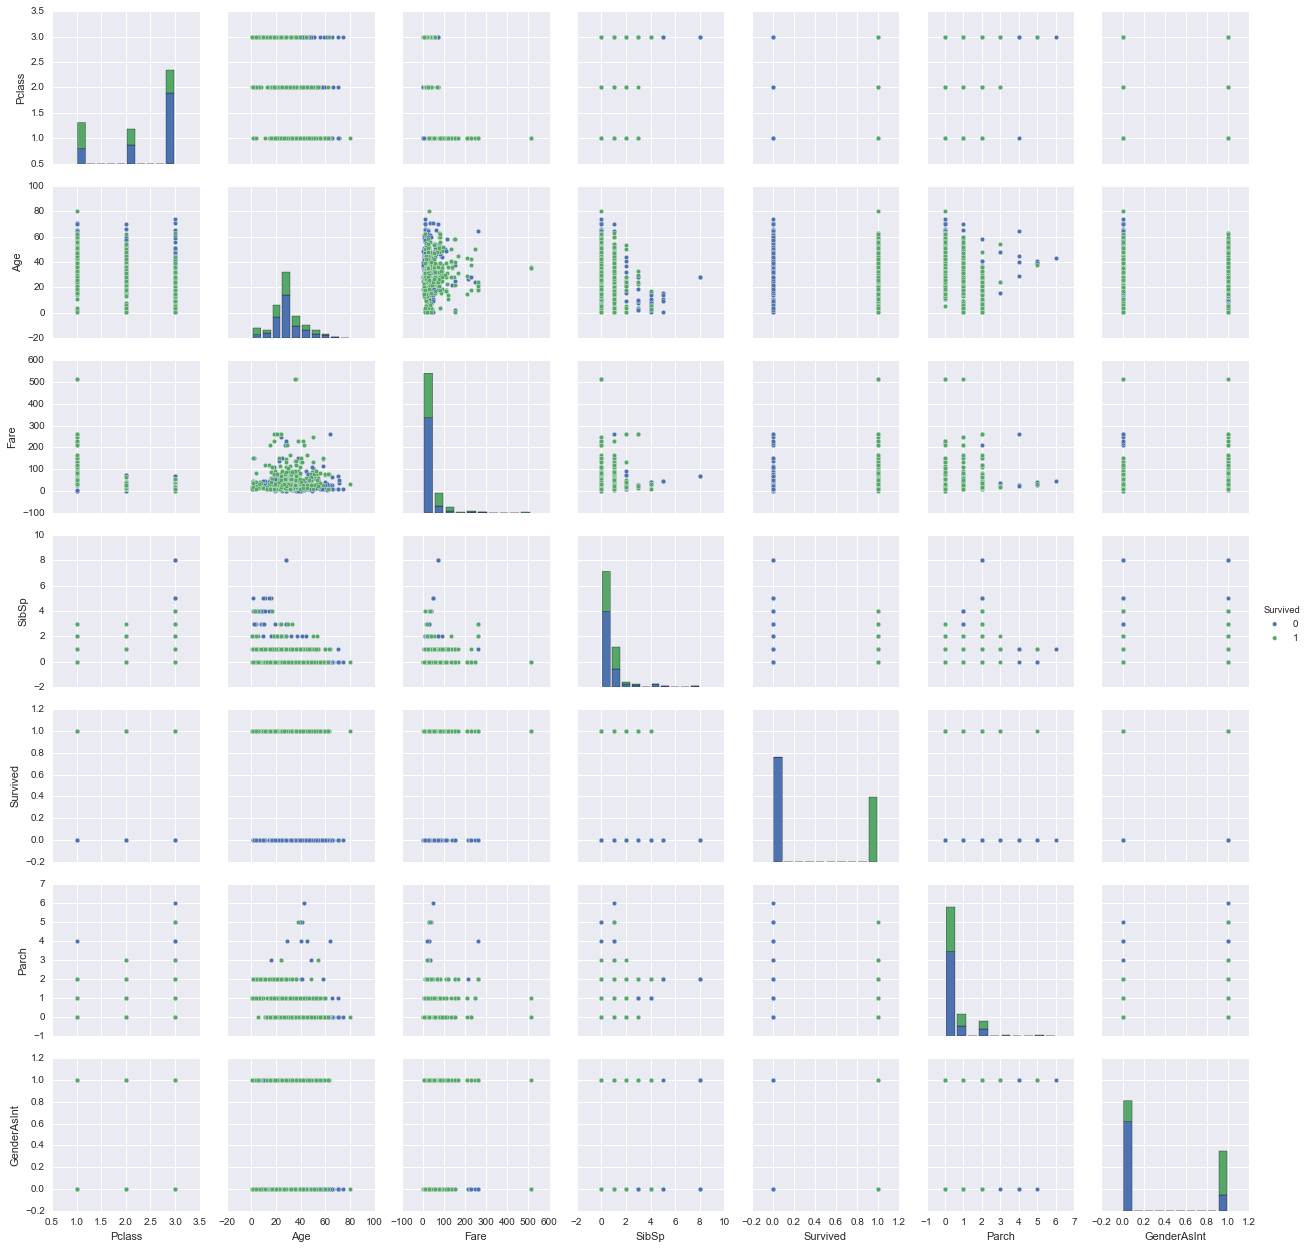

In [24]:
sns.pairplot(data=train[['Pclass', 'Age', 'Fare', 'SibSp', 'Survived', 'Parch', 'GenderAsInt']].dropna(),
             hue='Survived')

In [13]:
from statsmodels.graphics.mosaicplot import mosaic

(<matplotlib.figure.Figure at 0x116a79cd0>,
 OrderedDict([(('3', '0'), (0.0, 0.0, 0.5456101165672124, 0.75512040652001811)), (('3', '1'), (0.0, 0.75844266565623075, 0.5456101165672124, 0.24155733434376919)), (('1', '0'), (0.5505606116167173, 0.0, 0.24002400240024002, 0.3691399040236249)), (('1', '1'), (0.5505606116167173, 0.37246216315983754, 0.24002400240024002, 0.6275378368401624)), (('2', '0'), (0.7955351090664623, 0.0, 0.20446489093353776, 0.52542250469449658)), (('2', '1'), (0.7955351090664623, 0.52874476383070912, 0.20446489093353776, 0.47125523616929071))]))

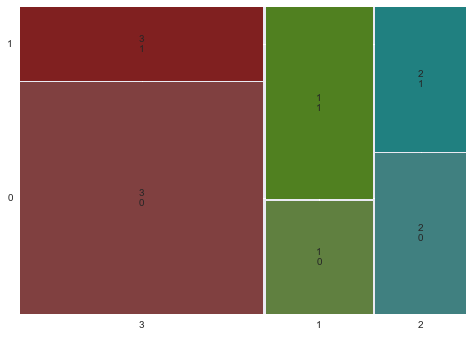

In [14]:
mosaic(train, ['Pclass', 'Survived'])

(<matplotlib.figure.Figure at 0x11cf479d0>,
 OrderedDict([(('male', '0'), (0.0, 0.0, 0.6443651551445914, 0.80839719709575819)), (('male', '1'), (0.0, 0.81171945623197084, 0.6443651551445914, 0.18828054376802911)), (('female', '0'), (0.6493402795227009, 0.0, 0.35065972047729926, 0.25710476754766487)), (('female', '1'), (0.6493402795227009, 0.26042702668387752, 0.35065972047729926, 0.73957297331612237))]))

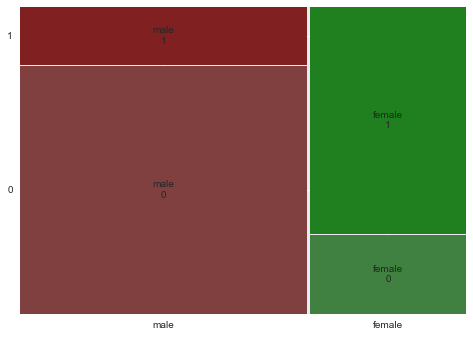

In [15]:
mosaic(train, ['Sex', 'Survived'])

In [16]:
def survived_as_int(survived):
    if survived == "Died":
        return 0.0
    else:
        return 1.0

train['SurvivedInt'] = train.apply(lambda row: survived_as_int(row["Survived"]), 1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedInt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


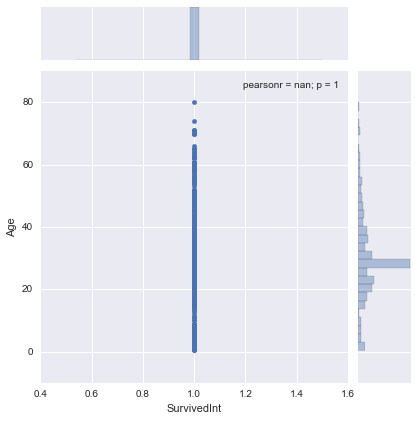

In [18]:
sns.jointplot('SurvivedInt', 'Age', data=train)

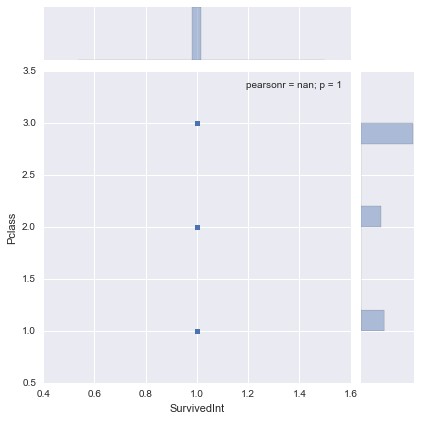

In [19]:
sns.jointplot('SurvivedInt', 'Pclass', data=train)

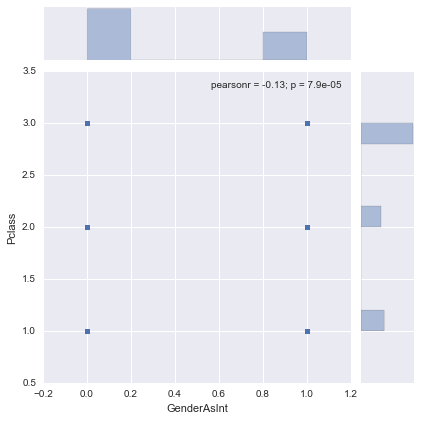

In [21]:
sns.jointplot('GenderAsInt', 'Pclass', data=train)

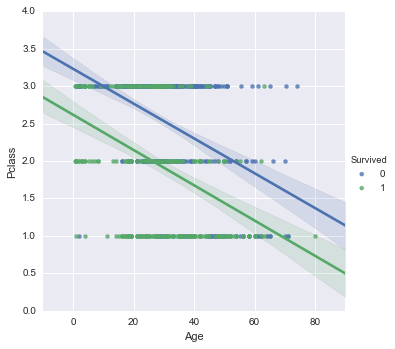

In [25]:
sns.lmplot('Age', 'Pclass', train, hue='Survived')

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedInt,GenderAsInt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0


In [33]:
filler_ages = train[['Age', 'Sex', 'Pclass']].groupby(['Sex', 'Pclass']).median()

In [37]:
filler_ages.loc['female'].loc[1]

Age    32.5
Name: 1, dtype: float64